**Task 2 :** *To perform a data cleaning and exploratory data analysis (EDA) on a Titanic dataset. Explore the relationships between variables and identify patterns and trends in the data.*

Import the libraries

In [49]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics


Reading the dataset

In [50]:
df = pd.read_csv("/content/train.csv")

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of a Dataframe

In [52]:
df.shape

(891, 12)

In [53]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Checking for Null Values

In [54]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [55]:
df['Age'].median()

28.0

Filling the missing values of the age column by Median value of the column

In [56]:
df['Age']=df['Age'].replace(np.nan,28.0)

In [57]:
df['Age'].isna().sum()

0

In [58]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [59]:
df['Age'] = df['Age'].round()
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


Dropping unnecessary columns

In [60]:
df=df.drop(columns='Cabin')

Filling the missing values of the Embarked column by Mode value of the column

In [61]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [62]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Checking for duplicated values

In [63]:
df.duplicated().sum()

0

Identify categorical and numerical data

In [64]:
cat=df.select_dtypes(include=['object']).columns
num=df.select_dtypes(exclude=['object']).columns
print('cat:',cat)
print('num:',num)

cat: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')
num: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.356902,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.017814,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Correlation

In [66]:
data=df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034219,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064577,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.340279,0.083081,0.018443,-0.549500
Age,0.034219,-0.064577,-0.340279,1.000000,-0.233114,-0.172435,0.096882
SibSp,-0.057527,-0.035322,0.083081,-0.233114,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172435,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096882,0.159651,0.216225,1.000000


**Data Visualization**

***1. Histogram***

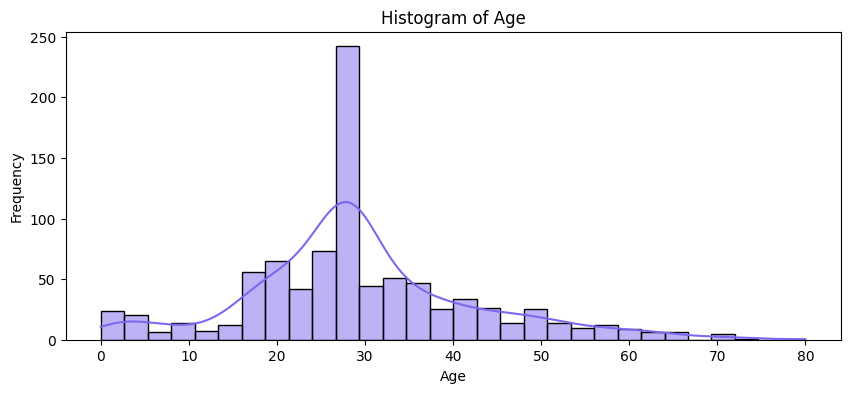

In [67]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True, color = 'mediumslateblue')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Display the plot
plt.show()

***2. Count Plot***

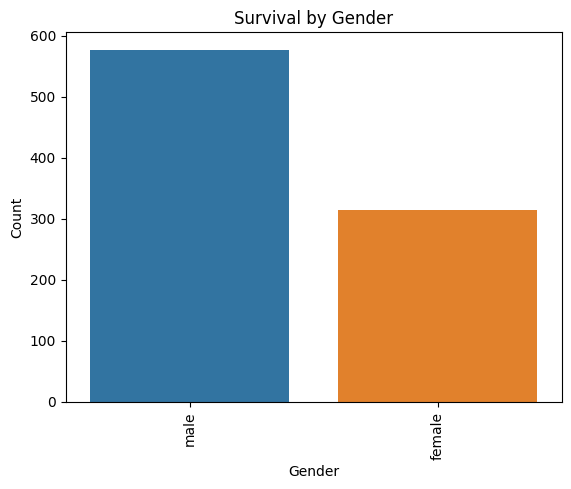

In [68]:
sns.countplot(data=df,x="Sex",hue="Sex")
plt.xticks(rotation=90)
plt.xlabel("Gender",fontsize=10,color="black")
plt.ylabel("Count",fontsize=10,color="black")
plt.title("Survival by Gender",color="black")
plt.show()

***3. Pair Plot***

In [69]:
fig = px.scatter_matrix(df, dimensions=['Age', 'Survived', 'Pclass'],
                        title='Daily Fitness Snapshot',
                        labels={'Age': 'Age', 'Survived': 'Survived','Pclass': 'Pclass'},
                        color_discrete_sequence=['green'])

fig.show()


***4. Scatter Plot***

In [70]:
fig1 = px.scatter(df, x='Embarked', y='Fare', title='Relationship between Embarked and Fare',
                  labels={'Embarked', 'Fare'},
                  color_discrete_sequence=['peru'])
fig1.show()

***5. Heat Map***

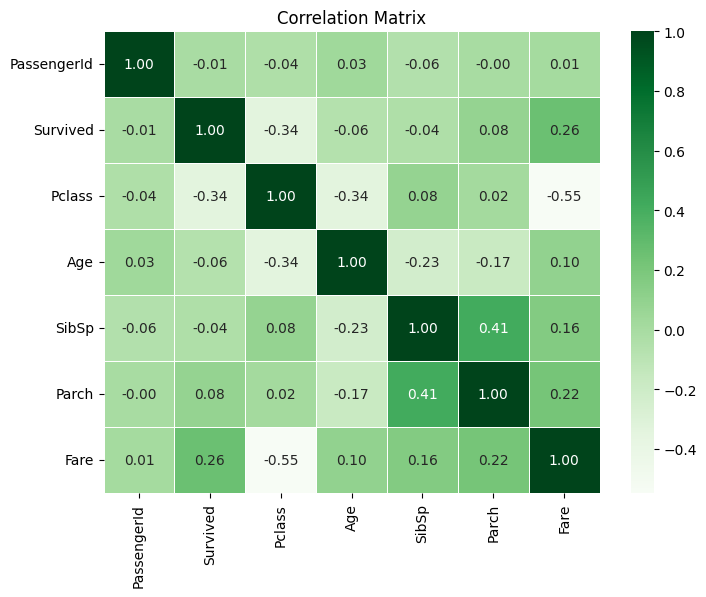

In [72]:
num_column = df.select_dtypes(include='number')
matrix = num_column.corr()

plt.figure(figsize =(8,6))
sns.heatmap(matrix, annot = True, cmap = 'Greens', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()